# Intro to Scikit Learn and SVMs

# Scikit Learn


First we are going to load the iris dataset that is shipped with Scikit-Learn.

In [0]:
from sklearn import datasets
iris = datasets.load_iris()

<img align="right" width="200" alt="Iris (source: Wikipedia: https://en.wikipedia.org/wiki/Iris_flower_data_set" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1024px-Iris_versicolor_3.jpg">

There are many ways to get an idea of how the dataset is structured. In this environment, you can select the code block above and hover with your mouse pointer over the iris. Try this, to see the result.

We can also print the contents with the following statement:

In [0]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

To clear the output, use the button to the left of the code (below the play button). The above statement shows that there is a textual **description** in the .DESCR member. The following statement prints that description:

In [0]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Support Vector Machines (SVMs)

First we are going to prepare our dataset. To make it easy to visualize we are going to work with only 2 dimensions of the set. We use column 2 and 3 (0-based, so it is column 3 and 4), petal length and petal width. 

`X` denotes data that is observed at training and prediction time, used as independent variables in learning. The notation is uppercase to denote that it is ordinarily a matrix.

`y` denotes data that may be observed at training time as the dependent variable in learning, but which is unavailable at prediction time, and is usually the target of prediction.

In [0]:
X = iris["data"][:, (2, 3)] # : means beginning to end, (2, 3) means take only columns 2 and 3 (0-based counting)
y = iris["target"]

To check if X and y are as expected, we can inspect them with print(X), or simply X. With len(X), you can check how many samples are in the training set.

In [0]:
len(X)

150

We are goning to use SVM as a binary classifier. As there are three classes in the dataset, we or going to throw a part away. We only use the Iris Setosa (y=0) and Iris Versicolor (y=1) data.

In [0]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
len(X)

100

Lets visualize the data we have

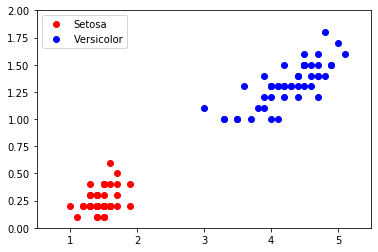

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro" , label="Setosa") # plot column 0 on the X axis, 1 on the Y axis. bo means blue circles
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Versicolor")
plt.legend()
plt.axis([0.5, 5.5, 0, 2])
plt.show()

Now, we are going to train the SVM to perform classification.

In [0]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

To visualize the SVM, we have a custom function to draw the decision line and the "gutters".

In [0]:
import numpy as np

# This function makes the "clean" plot
def plot_svc_clean(svm_clf, xmin, xmax):
    # First, get the w and b parameters out of the SMV classifier svm_clf
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=360)  # draw the "support vectors"

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "r--", linewidth=2)
    plt.plot(x0, gutter_down, "r--", linewidth=2)

# This function makes the "colored" plot with the classes
def plot_svc_classes(svm_clf, X, y, x_min, x_max, y_min, y_max):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Setosa") # plot column 0 on the X axis, 1 on the Y axis. bo means blue circles
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Versicolor")

    plt.xticks = False

    #plt.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=100, facecolors='none', zorder=10, edgecolors='k')
    #plt.scatter(Xo[:, 0], Xo[:, 1], c=yo, zorder=10, cmap=plt.cm.Paired, edgecolors='k')

    XX, YY = np.mgrid[x_min:x_max:800j, y_min:y_max:400j]
    Z = svm_clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    #plt.figsize=(xmax-xmin, ymax-ymin)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)

    # Decision line
    plt.contour(XX, YY, Z, colors=['r', 'k', 'r'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    # Draw the support vectors
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=360)  # draw the "support vectors"  

The SVM can now be plotted together with the data.

[0, 5.5, 0, 2]

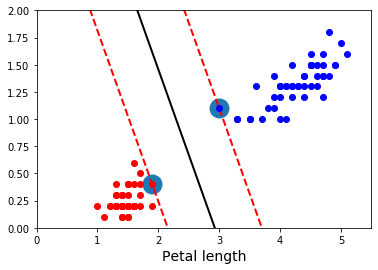

In [0]:
plot_svc_clean(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

Text(0.5, 0, 'Petal length')

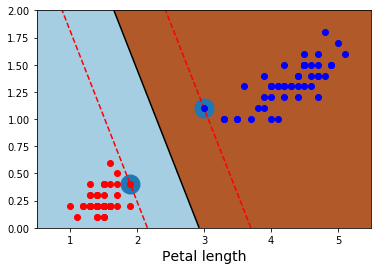

In [0]:
plot_svc_classes(svm_clf, X, y, 0.5, 5.5, 0, 2)
#plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
#plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
plt.xlabel("Petal length", fontsize=14)

# SVMs with more tricky data

The previous examples had extremely nice data, as it was "linear seperable". We are now going to look at more "difficult" data.



[0.5, 5.5, 0, 2]

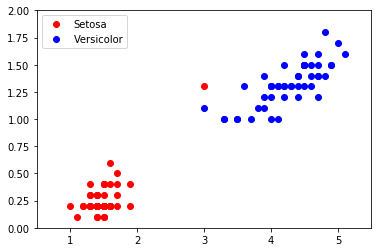

In [0]:
# Take X and add one sample at 3.4, 1.3 of class y=0
Xo = np.append(X, [[3.0, 1.3]], axis=0)
yo = np.append(y, [0])

# Plet the result
plt.plot(Xo[:, 0][yo==0], Xo[:, 1][yo==0], "ro" , label="Setosa") # plot column 0 on the X axis, 1 on the Y axis. bo means blue circles
plt.plot(Xo[:, 0][yo==1], Xo[:, 1][yo==1], "bo", label="Versicolor")
plt.legend()
plt.axis([0.5, 5.5, 0, 2])

#X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])


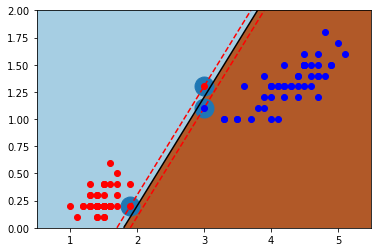

In [0]:
svm_clf = SVC(kernel="linear", C=1000)
svm_clf.fit(Xo, yo)

plot_svc_classes(svm_clf, Xo, yo, 0.5, 5.5, 0, 2)

In the example above, you can try different C values to see what happens. Try 0.1, 1, 10, 1000. Which one do you think generalizes best?

We can also use different "kernels". Below we use a polynomial kernel.

In [0]:
svm_clf = SVC(kernel="poly", C=10000, degree=3)
svm_clf.fit(Xo, yo)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

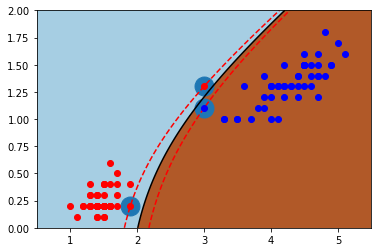

In [0]:
plot_svc_classes(svm_clf, Xo, yo, 0.5, 5.5, 0, 2)

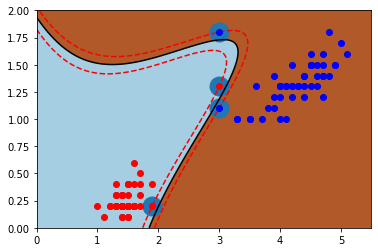

In [0]:
# Now add tho extra points, one for each class
Xo = np.append(X, [[3.0, 1.3], [3.0, 1.8]], axis=0)
yo = np.append(y, [0, 1])

svm_clf = SVC(kernel="poly", C=10000, degree=4, gamma="auto")
svm_clf.fit(Xo, yo)
plot_svc_classes(svm_clf, Xo, yo, 0, 5.5, 0, 2)

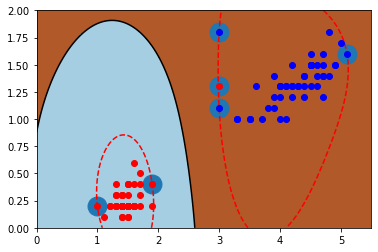

In [0]:
# Now add tho extra points, one for each class
Xo = np.append(X, [[3.0, 1.3], [3.0, 1.8]], axis=0)
yo = np.append(y, [0, 1])

svm_clf = SVC(kernel="rbf", C=10, gamma="auto")
svm_clf.fit(Xo, yo)
plot_svc_classes(svm_clf, Xo, yo, 0, 5.5, 0, 2)

In the examples above, you can try different values for C and for degree. To see all options for the SVM you can have a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#).

# References
<img align="right" alt="Book cover Hands-On Machine Learning with Scikit-Learn & TensorFlow" src="http://akamaicovers.oreilly.com/images/9781491962282/cat.gif">

This material is based on the book Hands-On Machine Learning with
Scikit-Learn and TensorFlow by Aurélien Géron (O’Reilly) and on the accompanying [Github repository](https://https://github.com/ageron/handson-ml). To continue on the above examples and to recreate the pictures used in the presentation, go to the repository and to Chapter 5.

Moreover, the [Tutorials](https://scikit-learn.org/stable/tutorial/index.html) and other documentation from the Scikit Learn website were used as inspiration for the visualisation of the SVMs.




This Notebook was created by Wilco Bonestroo, w.j.bonestroo@saxion.nl, https://www.linkedin.com/in/bonestroo/ for the School of AI session on January 9 at Saxion University of Applied Sciences in Enschede, the Netherlands.